In [1]:
# 설치
# !pip install colour
import cv2 as cv
import numpy as np
import colour
# pip install colour 가 아니다. 다른거다
# pip install colour-science  이다.
import utils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
# 사진 불러오기
img = cv.imread("img/4.jpg")

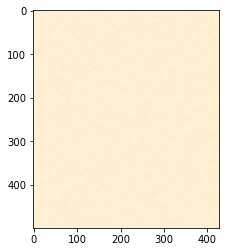

In [23]:
# 위에서 이미지 불러와서 img에 저장하면
# img는 3차원형태의 ndarray가 된다.

# return값은 height, width, channel이다.
# 이때 channel이 RGB3채널을 의미해서 3이라는 결과가 나온다.. (RGB가 아닌 BGR 순서이다.)

# 그래서 BGR  -> RGB로 바꿔준다.  헷갈리기 때문에
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [15]:
# # 그리고 차원이 분산되어있으므로 가로,세로는 하나의 array로 통합
# img = img.reshape((img.shape[0]*img.shape[1], 3))
# print(img.shape)

(214000, 3)


In [5]:
# # 알고리즘으로 이미지 학습을 시킨다.
# # scikit-learn의 k-mean 알고리즘 사용

# # k개의 데이터 평균을 만들어 clustering 할 생각

# k = 5
# clt = KMeans(n_clusters=k)
# #학습시키기
# clt.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# # 테스트용으로 한가지 색밖에 없는 이미지를 사용하긴 했지만
# # 나중에 피부색을 추출하면 여러색이 분포되어있을테니 비율을 정하는 함수를 만든다.

# def color_ratio(clt) :
#     numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
#     (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    
#     hist = hist.astype("float")
#     hist /= hist.sum()
    
#     return hist

# hist = color_ratio(clt)
# print(hist)


# k=5이므로 다섯개의 영역에 얼마만큼의 퍼센테이지가 차지되었는지 return된다.


[ 0.27888785  0.27682243  0.13314486  0.15358411  0.15756075]


In [7]:
# def plot_colors(hist, centroids):
#     # initialize the bar chart representing the relative frequency
#     # of each of the colors
#     bar = np.zeros((50, 300, 3), dtype = "uint8")
#     startX = 0
#     # loop over the percentage of each cluster and the color of
#     # each cluster
#     for (percent, color) in zip(hist, centroids):
#         # plot the relative percentage of each cluster
#         endX = startX + (percent * 300)
#         cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
#             color.astype("uint8").tolist(), -1)
#         startX = endX
        
#     # return the bar chart
#     return bar

In [ ]:
# hist = color_ratio(clt)
# bar = plot_colors(hist, clt.cluster_centers_)
# # show our color bart
# plt.figure()
# plt.axis("off")
# plt.imshow(bar)
# plt.show()

In [24]:
# 각 픽셀 단위로 색 추출하기

sum = 0
R = []
G = []
B = []
for i in img :
    for j in i :
        R.append(j[0])
        G.append(j[1])
        B.append(j[2])
        

print(max(R))  # R의 최댓값
print(max(G))  # R의 최댓값
print(max(B))  # R의 최댓값

R_sum = 0
G_sum = 0
B_sum = 0

# 각 R, G, B의 합계 구하기
for i in range(len(R)) :
    R_sum += R[i]
    G_sum += G[i]
    B_sum += B[i]


print("합계 : ", R_sum, G_sum, B_sum)

R_avg = round((R_sum / len(R)), 2) # R값 평균
G_avg = round((G_sum / len(G)), 2)  # R값 평균
B_avg = round((B_sum / len(B)), 2)  # R값 평균

print("평균 : ", R_avg, G_avg, B_avg)

RGB_color = [R_avg, G_avg, B_avg]


255
245
225
합계 :  54464118 51212003 45310374
평균 :  254.51 239.31 211.73


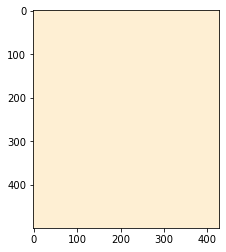

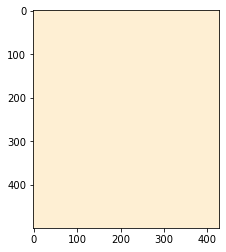

True

In [36]:
# 색을 기준으로 같은 사이즈로 새로 생성
img_avg = img

for i in img_avg :
    for j in i :
        j[0] = R_avg
        j[1] = G_avg
        j[2] = B_avg

#기존        
plt.imshow(img)
plt.show()

#평균색
plt.imshow(img_avg)
plt.show()
bgr_img_avg = cv.cvtColor(img_avg, cv.COLOR_RGB2BGR)

file_name = ""

cv.imwrite('img/avg_convert.jpg', bgr_img_avg)


In [37]:
# 먼셀 변환 
C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']
# 튜플 변환
print("RGB : ", RGB_color)
arr_RGB = np.array(RGB_color)
arr_RGB_convert = arr_RGB/255
tp_RGB_convert = tuple(arr_RGB_convert)


print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, C))))


KeyError: 'cie 1931 1 degree standard observer'

In [38]:
# illuminant를 기본값으로 할때
arr_RGB = np.array(RGB_color)
arr_RGB_convert = arr_RGB/255
tp_RGB_convert = tuple(arr_RGB_convert)


print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert))))


munsell :  7.0Y 9.5/4.8


In [40]:
# illuminant를  D65으로 할때
D65 = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']
arr_RGB = np.array(RGB_color)
arr_RGB_convert = arr_RGB/255
tp_RGB_convert = tuple(arr_RGB_convert)


print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D65))))


munsell :  7.0Y 9.5/4.8


In [41]:
# illuminant를  A로 할때
A = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['A']
arr_RGB = np.array(RGB_color)
arr_RGB_convert = arr_RGB/255
tp_RGB_convert = tuple(arr_RGB_convert)


print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, A))))

### 이건 안되네

d:\users\yhs\appdata\local\programs\python\python36\lib\site-packages\colour\utilities\verbose.py:235: ColourUsageWarning: "[ 0.46950274  0.41757033  0.8923189 ]" is not within "MacAdam" limits for illuminant "C"!
  warn(*args, **kwargs)


RuntimeError: Maximum inner iterations count reached without convergence!

In [42]:
# illuminant를  D65으로 할때
B = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['B']
arr_RGB = np.array(RGB_color)
arr_RGB_convert = arr_RGB/255
tp_RGB_convert = tuple(arr_RGB_convert)


print("munsell : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, B))))


munsell :  1.6Y 9.5/10.2


In [51]:
# 전체
A = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['A']
B = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['B']
C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']
D = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['D65']
E = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['E']
# F = colour.ILLUMINANTS['CIE 1994 2 Degree Standard Observer']['A']

# print("munsell A : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, A))))
print("munsell B : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, B))))
print("munsell C : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, C))))
print("munsell D : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, D))))
print("munsell E : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, E))))
# print("munsell F : ",colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(tp_RGB_convert, F))))

munsell B :  1.6Y 9.5/10.2
munsell C :  1.7Y 9.5/3.8
munsell D :  7.0Y 9.5/4.8
munsell E :  9.9YR 9.5/7.3
